In [70]:
import pandas as pd

# Load the dataset
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

# Convert 'Video Publish Time' to datetime and extract date
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])
df['Publish Date'] = df['Video Publish Time'].dt.date

In [71]:
# Define key performance indicator (KPI) columns for descriptive statistics
kpi_cols = [
    'Views',
    'Watch Time (hours)',
    'Subscribers',
    'Estimated Revenue (USD)',
    'Video Duration',
    'Like Rate (%)',
    'Video Thumbnail CTR (%)'
]

# Calculate descriptive statistics
descriptive_stats = df[kpi_cols].describe().transpose()

# Calculate total/sum for aggregated metrics
total_metrics = df[['Views', 'Watch Time (hours)', 'Subscribers', 'Estimated Revenue (USD)']].sum().to_frame(name='Total')

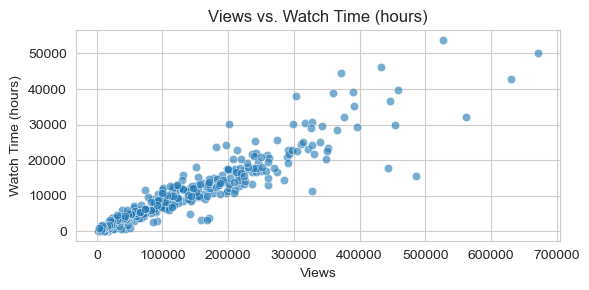

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

#Views vs. Watch Time (hours)
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Views', y='Watch Time (hours)', data=df, alpha=0.6)
plt.title('Views vs. Watch Time (hours)')
plt.xlabel('Views')
plt.ylabel('Watch Time (hours)')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

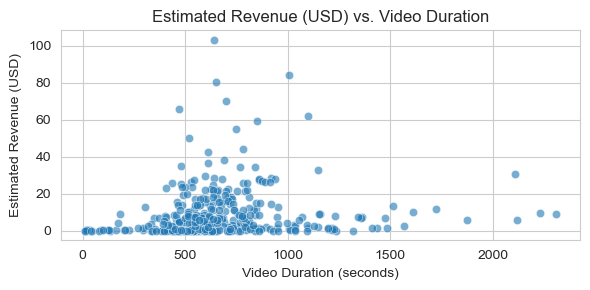

In [73]:
#Estimated Revenue (USD) vs. Video Duration
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Video Duration', y='Estimated Revenue (USD)', data=df, alpha=0.6)
plt.title('Estimated Revenue (USD) vs. Video Duration')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Estimated Revenue (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

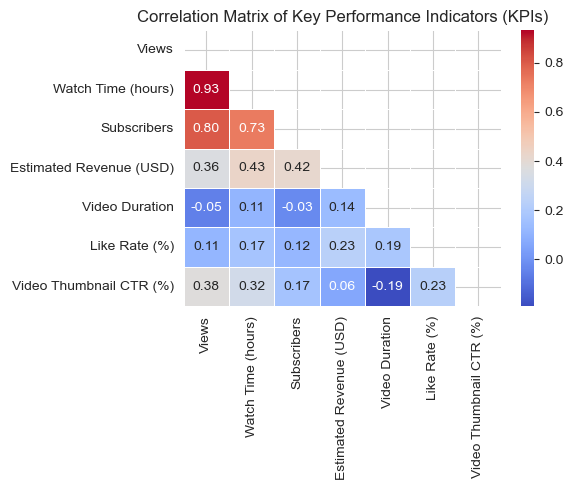

In [74]:
#Correlation Matrix (select key metrics)
correlation_cols = [
    'Views',
    'Watch Time (hours)',
    'Subscribers',
    'Estimated Revenue (USD)',
    'Video Duration',
    'Like Rate (%)',
    'Video Thumbnail CTR (%)'
]
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(6, 5))
# Create a mask for the upper triangle
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Matrix of Key Performance Indicators (KPIs)')
plt.tight_layout()
plt.show()
plt.close()

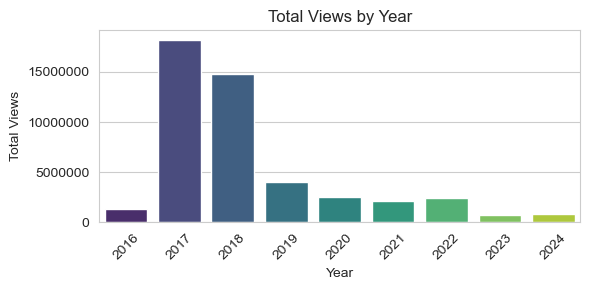

In [75]:
# Total Views by Year
views_by_year = df.groupby('Year')['Views'].sum().reset_index()

plt.figure(figsize=(6, 3))
sns.barplot(x='Year', y='Views', data=views_by_year, palette='viridis')
plt.title('Total Views by Year')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

In [76]:
#Preprocessing & Feature Engineering
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

# Define duration bins (in seconds)
bins = [0, 300, 600, 900, df['Video Duration'].max() + 1]
labels = ['Short (< 5 min)', 'Medium (5-10 min)', 'Long (10-15 min)', 'Very Long (> 15 min)']
df['Duration Group'] = pd.cut(df['Video Duration'], bins=bins, labels=labels, right=False)

# Define day order for categorical grouping
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=day_order, ordered=True)

In [77]:
#Performance by Video Thumbnail CTR (%) Quintiles
df['CTR Quintile'] = pd.qcut(df['Video Thumbnail CTR (%)'], q=5, labels=False, duplicates='drop')
df['CTR Quintile'] = df['CTR Quintile'].astype(str)
quintile_map = {'0': 'Q1 (Lowest)', '1': 'Q2', '2': 'Q3', '3': 'Q4', '4': 'Q5 (Highest)'}
df['CTR Quintile'] = df['CTR Quintile'].map(quintile_map).fillna('Q5 (Highest)')

ctr_quintile_performance = df.groupby('CTR Quintile', observed=False)[['Views', 'New Subscribers', 'Estimated Revenue (USD)', 'Video Thumbnail CTR (%)']].mean().reset_index()

print("Analysis 1: Average Performance by Video Thumbnail CTR (%) Quintile")
print(ctr_quintile_performance.sort_values(by='Video Thumbnail CTR (%)').to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))


Analysis 1: Average Performance by Video Thumbnail CTR (%) Quintile
| CTR Quintile   | Views     | New Subscribers   | Estimated Revenue (USD)   | Video Thumbnail CTR (%)   |
|:---------------|:----------|:------------------|:--------------------------|:--------------------------|
| Q1 (Lowest)    | 46769.91  | 140.84            | 6.31                      | 3.49                      |
| Q2             | 104462.07 | 365.07            | 11.54                     | 6.92                      |
| Q3             | 154525.10 | 514.29            | 10.89                     | 8.39                      |
| Q4             | 164073.51 | 352.78            | 7.02                      | 9.61                      |
| Q5 (Highest)   | 175312.63 | 382.00            | 8.60                      | 11.22                     |


In [78]:
#Revenue Efficiency (Revenue per View) 
df['Revenue per View (USD)'] = df['Estimated Revenue (USD)'].div(df['Views']).replace(np.inf, 0).fillna(0)

rpv_by_day = df.groupby('Day of Week', observed=True)['Revenue per View (USD)'].mean().reset_index()
rpv_by_duration = df.groupby('Duration Group', observed=True)['Revenue per View (USD)'].mean().reset_index()

print("\nAnalysis 2: Average Revenue per View (USD) by Day of Week")
print(rpv_by_day.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".6f"))

print("\nAnalysis 2: Average Revenue per View (USD) by Duration Group")
print(rpv_by_duration.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".6f"))


Analysis 2: Average Revenue per View (USD) by Day of Week
| Day of Week   | Revenue per View (USD)   |
|:--------------|:-------------------------|
| Monday        | 0.000108                 |
| Tuesday       | 0.000134                 |
| Wednesday     | 0.000083                 |
| Thursday      | 0.000149                 |
| Friday        | 0.000121                 |
| Saturday      | 0.000089                 |
| Sunday        | 0.000110                 |

Analysis 2: Average Revenue per View (USD) by Duration Group
| Duration Group       | Revenue per View (USD)   |
|:---------------------|:-------------------------|
| Short (< 5 min)      | 0.000035                 |
| Medium (5-10 min)    | 0.000063                 |
| Long (10-15 min)     | 0.000147                 |
| Very Long (> 15 min) | 0.000198                 |


In [79]:
#Engagement Metrics by Video Duration Group
engagement_by_duration = df.groupby('Duration Group', observed=True)[['Like Rate (%)', 'Average View Percentage (%)']].mean().reset_index()

print("\nAnalysis 3: Average Engagement Metrics by Video Duration Group")
print(engagement_by_duration.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))


Analysis 3: Average Engagement Metrics by Video Duration Group
| Duration Group       | Like Rate (%)   | Average View Percentage (%)   |
|:---------------------|:----------------|:------------------------------|
| Short (< 5 min)      | 93.97           | 62.53                         |
| Medium (5-10 min)    | 97.49           | 47.46                         |
| Long (10-15 min)     | 97.93           | 44.91                         |
| Very Long (> 15 min) | 97.14           | 36.27                         |


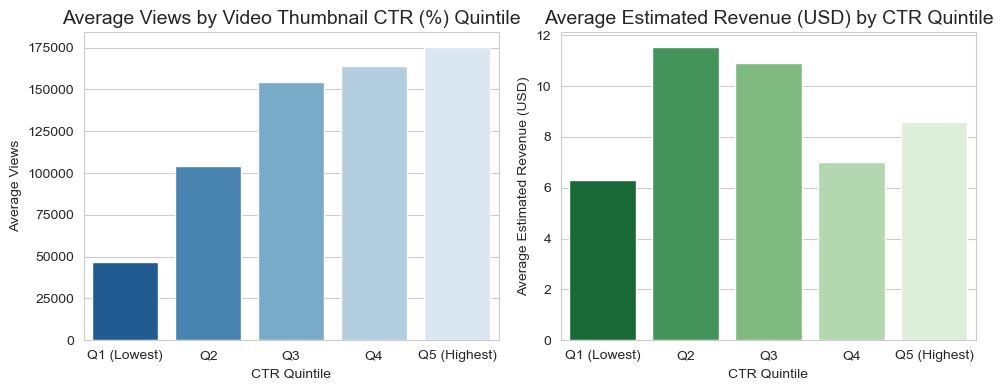

In [80]:
#CTR Quintile Performance
plot_data = ctr_quintile_performance.sort_values(by='Video Thumbnail CTR (%)')
plot_data_melted = plot_data.melt(id_vars='CTR Quintile', value_vars=['Views', 'Estimated Revenue (USD)'],
                                  var_name='Metric', value_name='Value')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Views by CTR Quintile
sns.barplot(ax=axes[0], x='CTR Quintile', y='Value', data=plot_data_melted[plot_data_melted['Metric'] == 'Views'], palette='Blues_r')
axes[0].set_title('Average Views by Video Thumbnail CTR (%) Quintile', fontsize=14)
axes[0].set_xlabel('CTR Quintile')
axes[0].set_ylabel('Average Views')
axes[0].ticklabel_format(style='plain', axis='y')

# Plot 2: Estimated Revenue (USD) by CTR Quintile
sns.barplot(ax=axes[1], x='CTR Quintile', y='Value', data=plot_data_melted[plot_data_melted['Metric'] == 'Estimated Revenue (USD)'], palette='Greens_r')
axes[1].set_title('Average Estimated Revenue (USD) by CTR Quintile', fontsize=14)
axes[1].set_xlabel('CTR Quintile')
axes[1].set_ylabel('Average Estimated Revenue (USD)')
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()
plt.close()

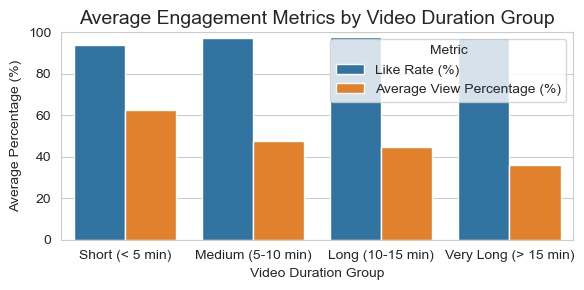

In [81]:
#Engagement Metrics by Duration Group
engagement_melted = engagement_by_duration.melt(id_vars='Duration Group', value_vars=['Like Rate (%)', 'Average View Percentage (%)'],
                                                var_name='Metric', value_name='Percentage')

plt.figure(figsize=(6, 3))
sns.barplot(x='Duration Group', y='Percentage', hue='Metric', data=engagement_melted, palette=['#1f77b4', '#ff7f0e'])
plt.title('Average Engagement Metrics by Video Duration Group', fontsize=14)
plt.xlabel('Video Duration Group')
plt.ylabel('Average Percentage (%)')
plt.ylim(0, 100) # Ensure y-axis is sensible for percentages
plt.legend(title='Metric')
plt.tight_layout()
plt.show()
plt.close()